In [0]:
'''
  author : @hunarbatra
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Data link : https://drive.google.com/open?id=1px6eWEh9tXAG94JMhfPqcrsv_lOCnrh2
link = '/content/drive/My Drive/task6_vulnerability.csv'
df = pd.read_csv(link)#, skiprows=[2,5,7])
df.head()

,Country,Class,UHC_index_2017,Health_Access_Quality_Index_2016 (over 100),Basic_Sanitization_Service_%People,Health_Expenditure_per_GDP,Health_Expenditure_per_capita_PPP_USD$,OOP_per_capita_PPP,Total_public_and_private_health_insurance_coverage,Physicians_per_10000_population,Critical_Beds_per_10000_Population,Life_Expectancy_years,Probability_of_Dying_between_30_70_from_chronic_diseases,Adult_Mortality_Rate_per_1000_population_2016 (per 1000),population_over_65_in_%(2018),smoking_prevalence_2012(%),Population_Density_per_sq_km,Population_2019,cases_avg,recovered_avg,death_avg,recovered_rate,death_rate,recovered_percentage,death_percentage,covid_test,test_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_avg,mobility_wo_res
0,Australia,High income,87,95.9,99.99,9.252000,4816.153809,874.233215,100.0,36.778,38.4,83.436,9.1,61.0,15.656475,16.299999,3.281,25203198,"7,077","6,444",100,0.910555,0.014130,91.055532,1.413028,380003,59.199720,-22.606742,-0.887640,-20.977528,-33.101124,-17.314607,9.876404,-14.168539,-18.977528
1,Brazil,Upper middle income,79,63.8,88.29,9.467477,1472.230957,404.208313,22.8,21.643,22.0,75.881,16.6,143.0,8.922838,13.800000,25.250,211049527,293357,116683,"18,894",0.397751,0.064406,39.775086,6.440617,23922,0.784938,-38.101124,-8.707865,-35.674157,-32.876404,-20.359551,11.179775,-20.756554,-27.143820
2,Denmark,High income,81,92.1,99.60,10.470000,5509.995605,756.988831,100.0,40.099,25.0,80.898,11.3,65.0,19.812953,18.700001,136.000,5771876,11117,9536,554,0.857785,0.049834,85.778537,4.983359,87024,12.487045,-18.887640,-6.651685,62.134831,-34.460674,-28.561798,9.573034,-2.808989,-5.285393
3,India,Lower middle income,55,41.2,59.54,3.534960,253.322418,158.076996,21.5,8.571,5.3,69.656,23.3,178.0,6.179956,12.600000,459.600,1366417754,112359,"45,300","3,435",0.403172,0.030572,40.317198,3.057165,318449,23.797325,-49.426966,-29.033708,-33.707865,-40.314607,-35.921348,16.943820,-28.576779,-37.680899
4,Italy,High income,82,94.9,98.77,8.813000,3619.697998,850.115295,100.0,39.774,31.8,83.512,9.5,54.0,22.751680,22.299999,205.900,60550075,227364,132282,"32,330",0.581807,0.142195,58.180715,14.219489,1244108,7.456829,-59.719101,-32.325843,-49.157303,-57.808989,-45.292135,20.674157,-37.271536,-48.860674


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 35 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Country                                                   10 non-null     object 
 1   Class                                                     10 non-null     object 
 2   UHC_index_2017                                            10 non-null     int64  
 3   Health_Access_Quality_Index_2016 (over 100)               10 non-null     float64
 4   Basic_Sanitization_Service_%People                        10 non-null     float64
 5   Health_Expenditure_per_GDP                                10 non-null     float64
 6   Health_Expenditure_per_capita_PPP_USD$                    10 non-null     float64
 7   OOP_per_capita_PPP                                        10 non-null     float64
 8   Total_public_and_privat

In [11]:
df = df.iloc[:,[0,12,14,23,24]]
df.fillna(0)
df.head()

,Country,Probability_of_Dying_between_30_70_from_chronic_diseases,population_over_65_in_%(2018),recovered_percentage,death_percentage
0,Australia,9.1,15.656475,91.055532,1.413028
1,Brazil,16.6,8.922838,39.775086,6.440617
2,Denmark,11.3,19.812953,85.778537,4.983359
3,India,23.3,6.179956,40.317198,3.057165
4,Italy,9.5,22.751680,58.180715,14.219489


In [0]:
countries = ['Australia', 'Brazil', 'Denmark', 'India', 'Japan', 'South Africa', 'South Korea', 'Sweden', 'United States']

In [13]:
# Scale data
from sklearn.preprocessing import StandardScaler
df_s = df.copy()
cols_to_norm = [col for col in df_s.columns if col not in ['Country']]
df_s[cols_to_norm] = StandardScaler().fit_transform(df_s[cols_to_norm])
df_s.head()

,Country,Probability_of_Dying_between_30_70_from_chronic_diseases,population_over_65_in_%(2018),recovered_percentage,death_percentage
0,Australia,-0.722570,0.000360,1.294053,-1.053919
1,Brazil,0.484396,-0.978730,-0.598798,0.175644
2,Denmark,-0.368527,0.604723,1.099270,-0.180748
3,India,1.562619,-1.377553,-0.578787,-0.651824
4,Italy,-0.658199,1.032022,0.080586,2.078069


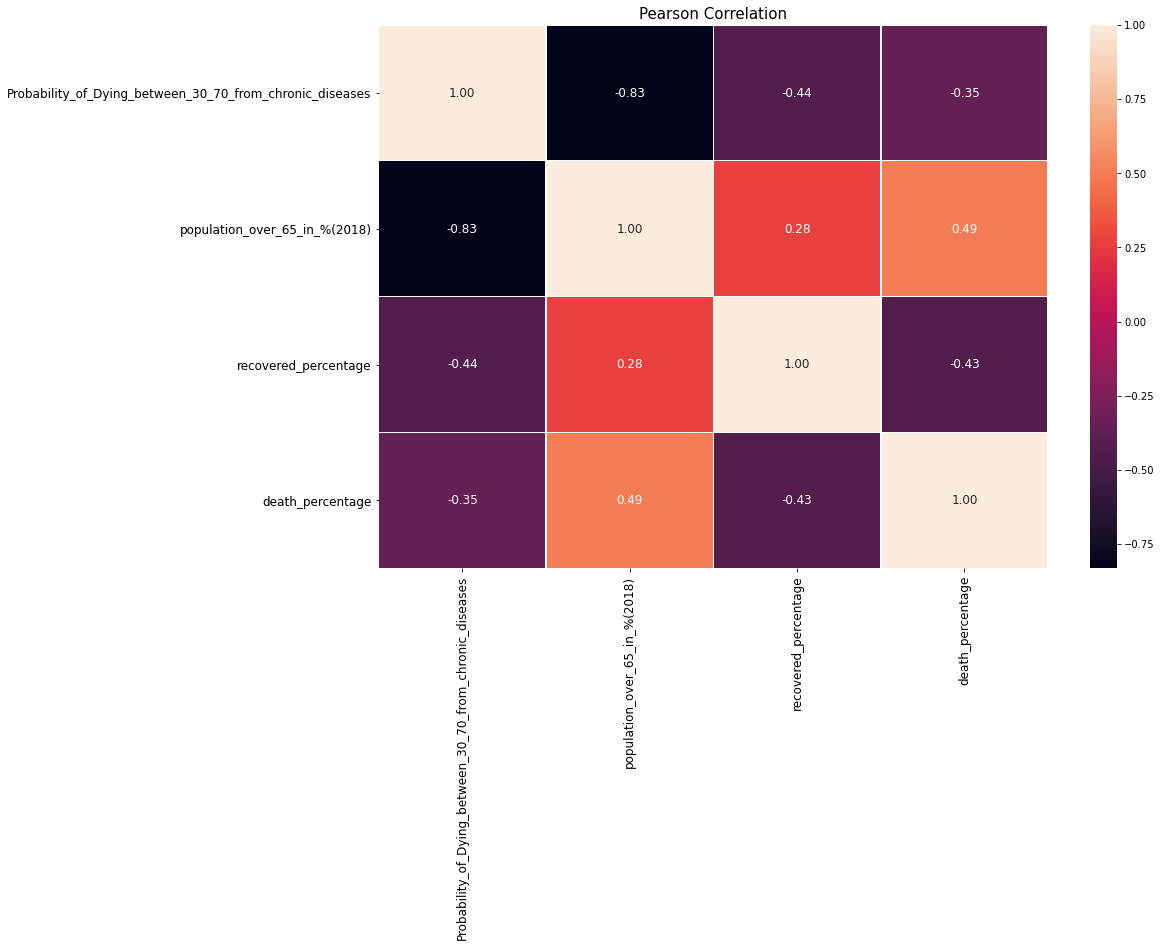

In [14]:
df_c = df
# Pearson correlation heat map 
f,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_c.corr(),linewidth=0.5,annot=True,annot_kws={"size":12},fmt=".2f",ax=ax)
ax.axes.set_title("Pearson Correlation",fontsize=15)
ax.tick_params(labelsize=12);